In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
market_df = pd.read_csv('mercado.csv')
matches_df = pd.read_csv('partidas.csv')
stadium_df = pd.read_csv('estadio.csv')
standings_df = pd.read_csv('classificacao.csv')

In [3]:
market_df.head()

,Time,Nome,Quantidade de Jogadores,Media de Idade,Jogadores Estrangeiros,Valor de Mercado,Media do Valor de Mercado,Campeonato,Edição Anterior,Quantidade de Títulos,Anos dos Títulos
0,América Mineiro,América Futebol Clube (MG),41,27.3,0,20.83,0.508,Brasileirão 2018,Série B (1),0,NaN
1,Atlético Mineiro,Clube Atlético Mineiro,39,25.3,5,40.30,1.030,Brasileirão 2018,9,1,1971
2,Atlético Paranaense,Clube Atlético Paranaense,38,26.3,2,32.30,0.850,Brasileirão 2018,11,1,2001
3,Bahia,Esporte Clube Bahia,38,25.4,1,28.80,0.758,Brasileirão 2018,12,2,"1959,1988"
4,Botafogo,Botafogo de Futebol e Regatas,37,25.8,4,32.20,0.870,Brasileirão 2018,10,2,"1968,1995"


In [4]:
matches_df.head()

,Time da Casa,Time Visitante,Tipo,Campeonato,Gols do Time da Casa,Gols do Time Visitante,Rodada,Ano,Mês,Dia,Hora,Resultado
0,Ceará,Vasco,Partida,Brasileirão 2018,0,0,38,2018,12,2,17:00,Empate
1,Bahia,Cruzeiro,Partida,Brasileirão 2018,0,0,38,2018,12,2,17:00,Empate
2,Paraná,Internacional,Partida,Brasileirão 2018,1,1,38,2018,12,2,17:00,Empate
3,Chapecoense,São Paulo,Partida,Brasileirão 2018,1,0,38,2018,12,2,17:00,Vitória
4,Grêmio,Corinthians,Partida,Brasileirão 2018,1,0,38,2018,12,2,17:00,Vitória


In [5]:
stadium_df.head()

,Time,Local,Estado,Estádio,Capacidade
0,América Mineiro,Belo Horizonte,Minas Gerais,Independência,23018
1,Atlético Mineiro,Belo Horizonte,Minas Gerais,Independência,23018
2,Atlético Paranaense,Curitiba,Paraná,Arena da Baixada,42370
3,Bahia,Salvador,Bahia,Arena Fonte Nova,47907
4,Botafogo,Rio de Janeiro,Rio de Janeiro,Olímpico Nilton Santos,44661


In [6]:
standings_df.head()

,Time,Campeonato,Posição,Pontos,Partidas,Vitórias,Empates,Derrotas,GolsFeitos,GolsSofridos,SaldoGols,Aproveitamento,Qualificação,Título
0,Palmeiras,Brasileirão 2018,1,80,38,23,11,4,64,26,38,70.2,Libertadores,Campeão
1,Flamengo,Brasileirão 2018,2,72,38,21,9,8,59,29,30,63.2,Libertadores,Vice-Campeão
2,Internacional,Brasileirão 2018,3,69,38,19,12,7,51,29,22,60.5,Libertadores,NaN
3,Grêmio,Brasileirão 2018,4,66,38,18,12,8,48,27,21,57.9,Libertadores,NaN
4,São Paulo,Brasileirão 2018,5,63,38,16,15,7,46,34,12,55.3,Libertadores,NaN


In [7]:
g_stadium = nx.from_pandas_edgelist(stadium_df, 
                                   'Time', 
                                   'Estádio',
                                   create_using=nx.DiGraph() 
                                   )

In [8]:
g_stadium.add_nodes_from(stadium_df['Estádio'].tolist())
new_stadium_df = stadium_df.copy()
new_stadium_df.set_index('Estádio', inplace=True)
nx.set_node_attributes(g_stadium, pd.Series(new_stadium_df.Local, index=new_stadium_df.index).to_dict(), 'Local')
nx.set_node_attributes(g_stadium, pd.Series(new_stadium_df.Capacidade, index=new_stadium_df.index).to_dict(), 'Capacidade')
nx.set_node_attributes(g_stadium, pd.Series(new_stadium_df.Estado, index=new_stadium_df.index).to_dict(), 'Estado')

In [9]:
g_market = nx.from_pandas_edgelist(market_df, 
                                   'Time', 
                                   'Campeonato', 
                                   ['Quantidade de Jogadores', 
                                    'Media de Idade',
                                    'Jogadores Estrangeiros', 
                                    'Valor de Mercado',
                                    'Media do Valor de Mercado',
                                    'Edição Anterior'
                                   ], 
                                   create_using=nx.DiGraph() 
                                   )

In [10]:
g_matches = nx.from_pandas_edgelist(matches_df, 
                                    'Time da Casa', 
                                    'Time Visitante', 
                                    ['Tipo', 
                                     'Campeonato', 
                                     'Gols do Time da Casa', 
                                     'Gols do Time Visitante', 
                                     'Rodada', 
                                     'Ano', 
                                     'Mês', 
                                     'Dia', 
                                     'Hora', 
                                     'Resultado'],
                                    create_using=nx.DiGraph() 
                                   )

In [11]:
g_standing = nx.from_pandas_edgelist(standings_df, 
                                     'Time', 
                                     'Campeonato', 
                                     ['Posição', 
                                      'Pontos', 
                                      'Partidas', 
                                      'Vitórias', 
                                      'Empates', 
                                      'Derrotas', 
                                      'GolsFeitos', 
                                      'GolsSofridos', 
                                      'SaldoGols', 
                                      'Aproveitamento', 
                                      'Qualificação', 
                                      'Título'], 
                                     create_using=nx.DiGraph() 
                                    )

In [12]:
g_clubs = nx.Graph()
g_clubs.add_nodes_from(market_df['Time'].tolist())
new_market_df = market_df.copy()
new_market_df.set_index('Time', inplace=True)
nx.set_node_attributes(g_clubs, pd.Series(new_market_df['Nome'], index=new_market_df.index).to_dict(), 'Nome')
nx.set_node_attributes(g_clubs, pd.Series(new_market_df['Anos dos Títulos'].str.split(','), index=new_market_df.index).to_dict(), 'Anos dos Títulos')
nx.set_node_attributes(g_clubs, pd.Series(new_market_df['Quantidade de Títulos'], index=new_market_df.index).to_dict(), 'Quantidade de Títulos')

In [13]:
G = nx.compose_all([g_stadium, g_clubs, g_market, g_matches,g_standing])

In [14]:
len(G.nodes()) == len(set(stadium_df['Estádio'])) + len(standings_df['Time']) + 1

True

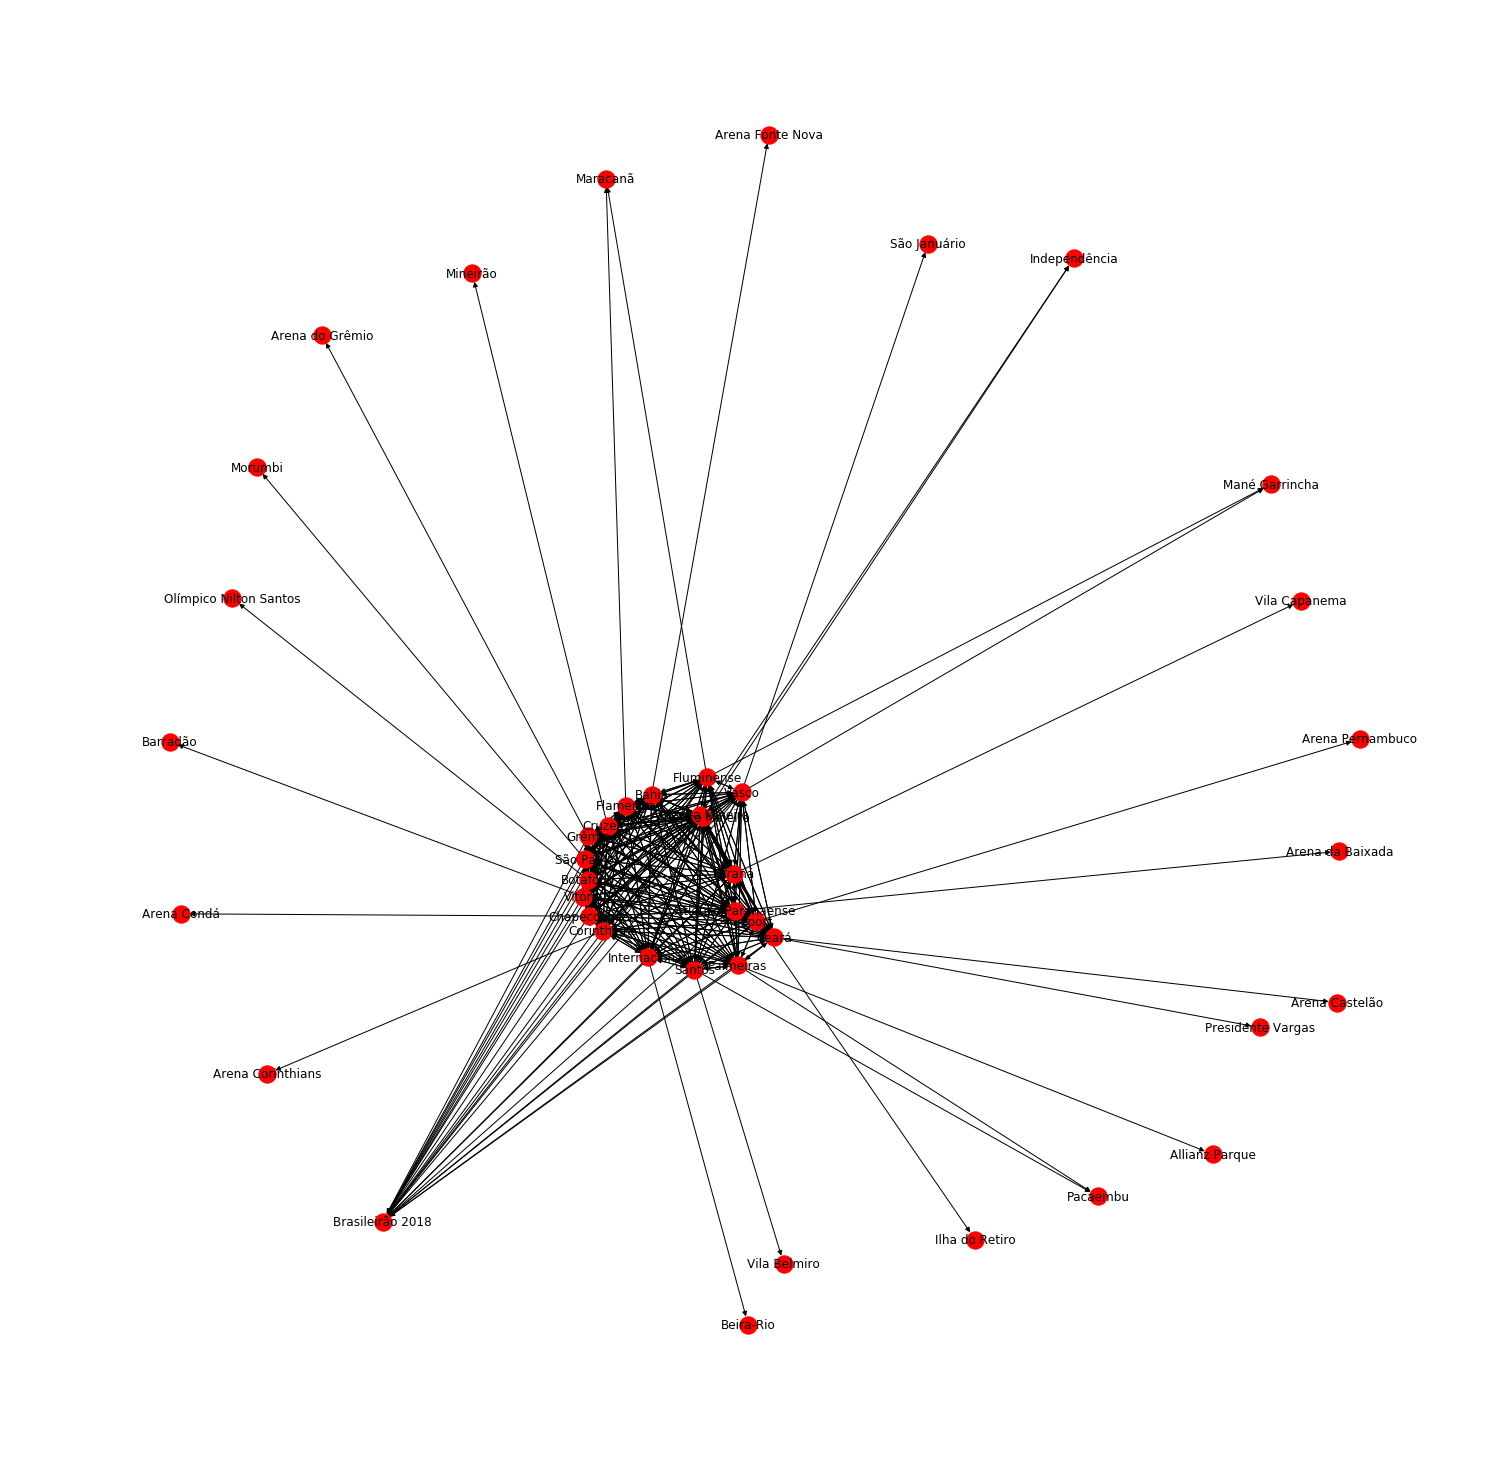

In [15]:
plt.figure(figsize=(20,20))
nx.draw(G, with_labels = True)
plt.show()

In [16]:
G['Flamengo']['Paraná']

{'Ano': 2018,
 'Campeonato': 'Brasileirão 2018',
 'Dia': 10,
 'Gols do Time Visitante': 0,
 'Gols do Time da Casa': 2,
 'Hora': '19:00',
 'Mês': 6,
 'Resultado': 'Vitória',
 'Rodada': 11,
 'Tipo': 'Partida'}